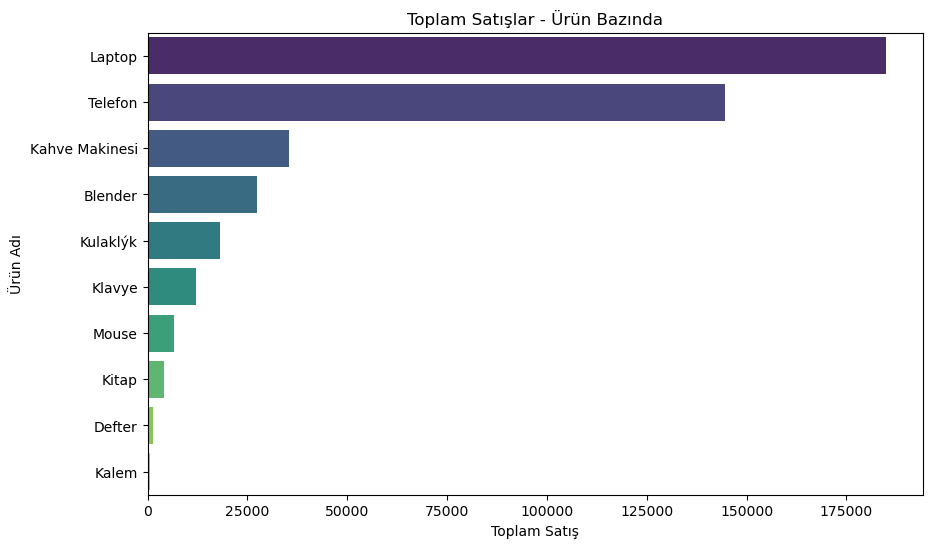

In [20]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect('sales_data.db')

query = """
    SELECT Product_Name, SUM(Price * Quantity) AS total_sales
    FROM sales_data
    GROUP BY Product_Name
    ORDER BY total_sales DESC
    LIMIT 10;  -- En çok satış yapılan ilk 10 ürünü al
"""
product_sales = pd.read_sql(query, conn)

conn.close()

plt.figure(figsize=(10, 6))
sns.barplot(x='total_sales', y='Product_Name', data=product_sales, palette='viridis')
plt.title('Toplam Satışlar - Ürün Bazında')
plt.xlabel('Toplam Satış')
plt.ylabel('Ürün Adı')
plt.show()


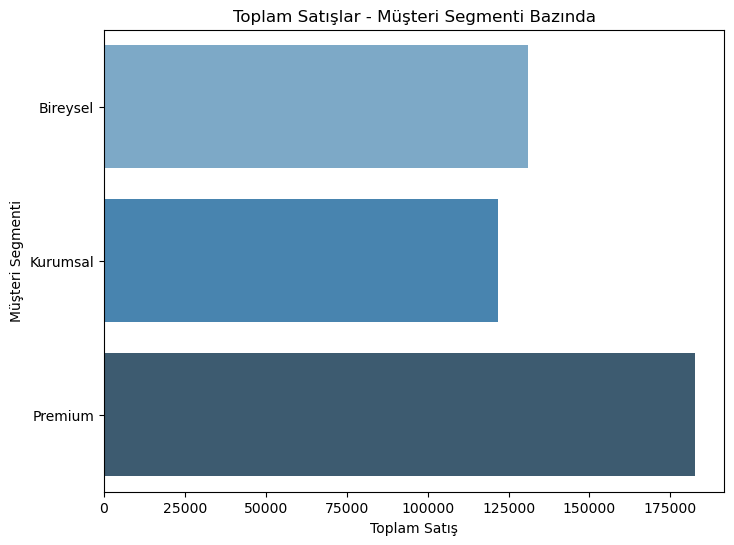

In [22]:
conn = sqlite3.connect('sales_data.db')

query = """
    SELECT Customer_Segment, SUM(Price * Quantity) AS total_sales
    FROM sales_data
    GROUP BY Customer_Segment
"""
segment_sales = pd.read_sql(query, conn)

conn.close()

plt.figure(figsize=(8, 6))
sns.barplot(x='total_sales', y='Customer_Segment', data=segment_sales, palette='Blues_d')
plt.title('Toplam Satışlar - Müşteri Segmenti Bazında')
plt.xlabel('Toplam Satış')
plt.ylabel('Müşteri Segmenti')
plt.show()


C:\Users\MONSTER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MONSTER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


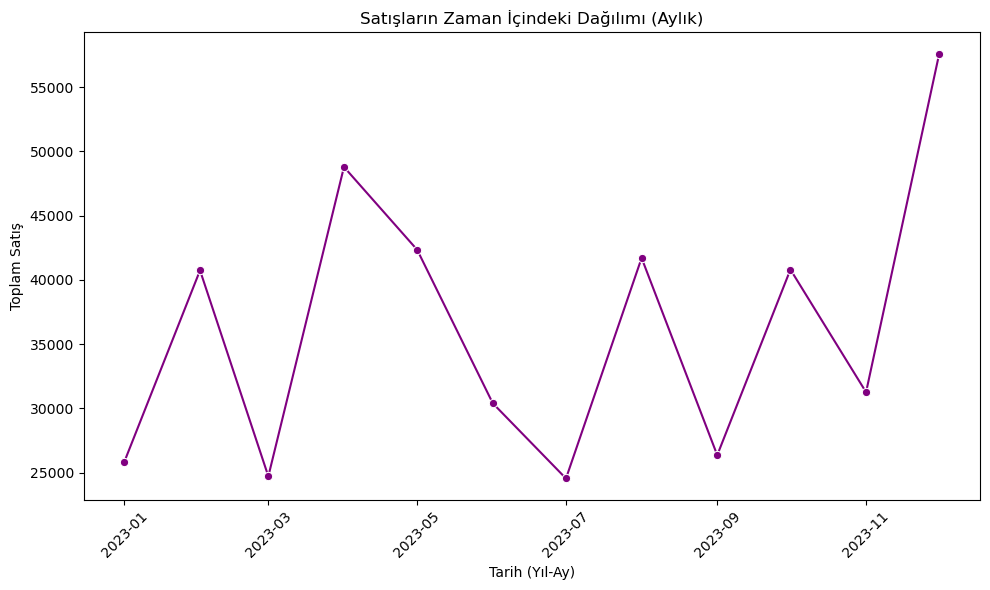

In [24]:
conn = sqlite3.connect('sales_data.db')
query = """
    SELECT strftime('%Y-%m', Order_Date) AS Year_Month, SUM(Price * Quantity) AS total_sales
    FROM sales_data
    GROUP BY Year_Month
    ORDER BY Year_Month;
"""
time_sales = pd.read_sql(query, conn)
conn.close()

time_sales['Year_Month'] = pd.to_datetime(time_sales['Year_Month'], format='%Y-%m')

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year_Month', y='total_sales', data=time_sales, marker='o', color='purple')
plt.title('Satışların Zaman İçindeki Dağılımı (Aylık)')
plt.xlabel('Tarih (Yıl-Ay)')
plt.ylabel('Toplam Satış')
plt.xticks(rotation=45)
plt.tight_layout()

time_sales_plot = 'monthly_sales.png'
plt.savefig(time_sales_plot)
plt.show()
